# ML Support Vector Machines - Classifier

Based on Tech with Tim's YouTube Channel

https://www.youtube.com/watch?v=45ryDIPHdGg
    
Dataset from https://archive.ics.uci.edu/ml/datasets.php    

More from sklearn https://scikit-learn.org/stable/modules/svm.html

## Hyperplanes
* A straight line to divide data
* A line is created by computing the equal distance between points
* The best hyperplane is ones with a big **MARGIN** and largest distance between points, a.k.a support vectors
* This is to maximise the empty space so we can sepearte the two classes and do more accurate predictions
* There also exists soft margins, another parameter that allows some outliers to sit in-between the hyperplane
* This may make soft margins more accurate in certain cases
* Hard margins reject the outliers within the hyperplane 

<img src = https://miro.medium.com/max/809/1*GPFxwsE4cqcPxul4GWGp1A.png>

## Problems with SVMs
* If data is not properly segmented, difficult to create hyperplanes
* Problems can be fixed by using **KERNELS** - basically a function
* A function that takes the existing dimensions and returned a new dimension
* Kernels can bring the data into 3 dimensions
* There may different types of kernels
* Typically you'd use an existing kernel instead of creating your own

\begin{align}
f(x_1,x_2) --> x_3\\
x_1^2 + x_2^2 = x_3
\end{align}

* x3 represents the third coordinate point based on inputs of x1 and x2
* This then enables hyperplanes to be created easily
* Basically moving from 2D to 3D system
* However, there may be cases where even a 3D system does not work
* Further iterations with adding more dimensions could help (e.g. 4th, 5th dimension)

In [1]:
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import svm
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier # To compare SVM with KNeighbours

In [2]:
# Loading dataset
cancer = datasets.load_breast_cancer(as_frame=True)

# cancer.feature_names
# cancer.target_names
# cancer.DESCR
cancer.frame

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [3]:
data = cancer.data
data.info()

# Where is the target/label?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
# Here it is!
# 0 represents malignant, 1 for benign

print(cancer.target)
print(cancer.target_names)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32
['malignant' 'benign']


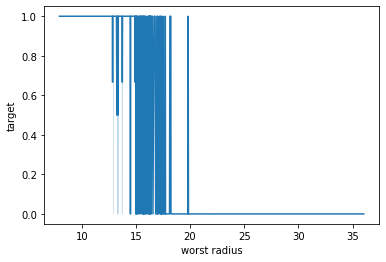

In [5]:
# separate the data from the target attributes

x = cancer.data
y = cancer.target


sns.lineplot(x['worst radius'],y)

In [6]:
# In dataframe format

df = cancer.frame

xdf = df['target']
ydf = df.drop('target', axis=1)

# Machine learning

In [7]:
classes = ['malignant', 'benign']
x = cancer.data
y = cancer.target

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2)

#print(x_train, y_train)

# C-Support Vector Classification

model = svm.SVC()
model.fit(x_train, y_train)

# 2 ways to do accuracy (preferred)
# First way
acc1 = model.score(x_test, y_test)
acc1

# Second way
predicted = model.predict(x_test)
acc2 = metrics.accuracy_score(y_test, predicted)

print(acc1, acc2)

0.9473684210526315 0.9473684210526315


Text(0, 0.5, 'Score ACC')

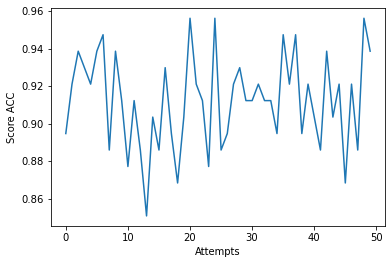

In [8]:
# Finding the range in accuracies

x = cancer.data
y = cancer.target

acclist = []
counter = []
for i in range(50):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2)
    model = svm.SVC(kernel='rbf')
    model.fit(x_train, y_train)
    acc = model.score(x_test, y_test)
    # print(acc)
    acclist.append(acc)
    counter.append(i)

# RBFlist = list(zip(acclist, counter)) # Don't really need to include counter here
RBFlist = list(acclist) # Generate an accuracy score table for RBF so we can compare with different kernel scores later
sns.lineplot(counter,acclist)
plt.xlabel('Attempts')
plt.ylabel('Score ACC')

# Adding different kernels to improve score

<img src = https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_0011.png>

# Linear Kernels

In [9]:
# Linear kernel
# Can also add a C parameter which is the 'soft' margin you want to introduce
# The higher the C value, the more points are allowed in that margin between support vectors
# C default is 1
# C = 0 for hard margin

x = cancer.data
y = cancer.target

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2)

# Adding a kernel here
# Choose from linear, poly, rbf (default), sigmoid, precomputed, callable

model = svm.SVC(kernel='linear', C=1)
model.fit(x_train, y_train)
acc = model.score(x_test, y_test)
acc


0.9736842105263158

Text(0, 0.5, 'Score ACC')

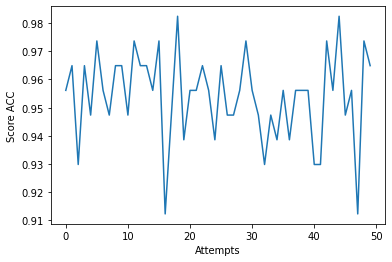

In [10]:
# Linear kernel accuracies
x = cancer.data
y = cancer.target

acclist = []
counter = []
for i in range(50):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2)
    model = svm.SVC(kernel='linear', C=1)
    model.fit(x_train, y_train)
    acc = model.score(x_test, y_test)
    # print(acc)
    acclist.append(acc)
    counter.append(i)

linearlist = list(acclist)
sns.lineplot(counter,acclist)
plt.xlabel('Attempts')
plt.ylabel('Score ACC')

# Poly kernels

<img src = https://www.onlinemathlearning.com/image-files/xpolynomial.png.pagespeed.ic.kFrzF97u19.png>

Text(0, 0.5, 'Score ACC')

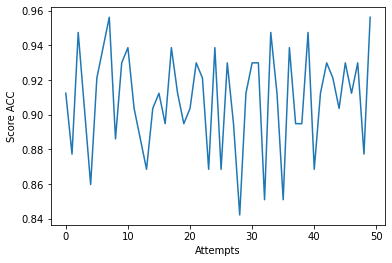

In [11]:
# poly kernel
# can also change the degree of the polynomial

x = cancer.data
y = cancer.target

acclist = []
counter = []
for i in range(50):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2)
    model = svm.SVC(kernel='poly', degree=3)
    model.fit(x_train, y_train)
    acc = model.score(x_test, y_test)
    # print(acc)
    acclist.append(acc)
    counter.append(i)

polylist = list(acclist)
sns.lineplot(counter,acclist)
plt.xlabel('Attempts')
plt.ylabel('Score ACC')

# Sigmoid kernels

Text(0, 0.5, 'Score ACC')

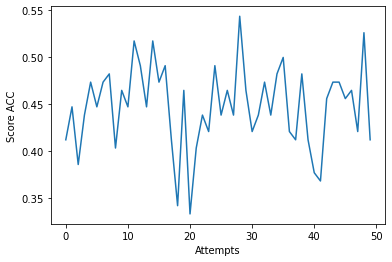

In [12]:
# sigmoid kernel
x = cancer.data
y = cancer.target

acclist = []
counter = []
for i in range(50):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2)
    model = svm.SVC(kernel='sigmoid')
    model.fit(x_train, y_train)
    acc = model.score(x_test, y_test)
    # print(acc)
    acclist.append(acc)
    counter.append(i)

siglist = list(acclist)
sns.lineplot(counter,acclist)
plt.xlabel('Attempts')
plt.ylabel('Score ACC')

In [13]:
df = pd.DataFrame(zip(RBFlist,linearlist,polylist,siglist), columns=['RBF','Linear','Poly','Sigmoid'])
df

,RBF,Linear,Poly,Sigmoid
0,0.894737,0.956140,0.912281,0.412281
1,0.921053,0.964912,0.877193,0.447368
2,0.938596,0.929825,0.947368,0.385965
3,0.929825,0.964912,0.903509,0.438596
4,0.921053,0.947368,0.859649,0.473684
5,0.938596,0.973684,0.921053,0.447368
6,0.947368,0.956140,0.938596,0.473684
7,0.885965,0.947368,0.956140,0.482456
8,0.938596,0.964912,0.885965,0.403509
9,0.912281,0.964912,0.929825,0.464912


# Combined kernels score plot

Sigmoid seems sh!t


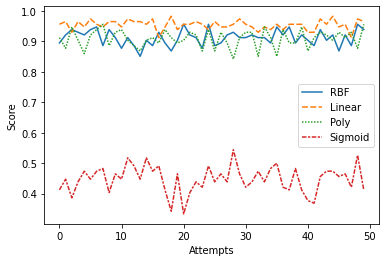

In [14]:
sns.lineplot(data=df)
plt.xlabel('Attempts')
plt.ylabel('Score')
print('Sigmoid seems sh!t')

# Predictions & validation

In [15]:
x = cancer.data
y = cancer.target

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2)
model = svm.SVC()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

In [16]:
# Convert predictions from array to dataframe format

preddf = pd.DataFrame(predictions, columns=['Predicted'])
preddf

,Predicted
0,1
1,0
2,1
3,1
4,0
...,...
109,1
110,0
111,0
112,1


In [17]:
# The x_test index needs to be similar to predictdf to combine them

x_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
438,13.850,19.60,88.68,592.6,0.08684,0.06330,0.01342,0.02293,0.1555,0.05673,...,15.630,28.01,100.90,749.1,0.1118,0.1141,0.04753,0.05890,0.2513,0.06911
406,16.140,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,0.05875,...,17.710,19.58,115.90,947.9,0.1206,0.1722,0.23100,0.11290,0.2778,0.07012
554,12.880,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,0.1566,0.05708,...,13.890,35.74,88.84,595.7,0.1227,0.1620,0.24390,0.06493,0.2372,0.07242
463,11.600,18.36,73.88,412.7,0.08508,0.05855,0.03367,0.01777,0.1516,0.05859,...,12.770,24.02,82.68,495.1,0.1342,0.1808,0.18600,0.08288,0.3210,0.07863
15,14.540,27.54,96.73,658.8,0.11390,0.15950,0.16390,0.07364,0.2303,0.07077,...,17.460,37.13,124.10,943.2,0.1678,0.6577,0.70260,0.17120,0.4218,0.13410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,11.990,24.89,77.61,441.3,0.10300,0.09218,0.05441,0.04274,0.1820,0.06850,...,12.980,30.36,84.48,513.9,0.1311,0.1822,0.16090,0.12020,0.2599,0.08251
29,17.570,15.05,115.00,955.1,0.09847,0.11570,0.09875,0.07953,0.1739,0.06149,...,20.010,19.52,134.90,1227.0,0.1255,0.2812,0.24890,0.14560,0.2756,0.07919
164,23.270,22.04,152.10,1686.0,0.08439,0.11450,0.13240,0.09702,0.1801,0.05553,...,28.010,28.22,184.20,2403.0,0.1228,0.3583,0.39480,0.23460,0.3589,0.09187
114,8.726,15.83,55.84,230.9,0.11500,0.08201,0.04132,0.01924,0.1649,0.07633,...,9.628,19.62,64.48,284.4,0.1724,0.2364,0.24560,0.10500,0.2926,0.10170


In [18]:
# Removing the index by restting it

x_test = x_test.reset_index()
x_test = x_test.drop('index', axis=1)
x_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,13.850,19.60,88.68,592.6,0.08684,0.06330,0.01342,0.02293,0.1555,0.05673,...,15.630,28.01,100.90,749.1,0.1118,0.1141,0.04753,0.05890,0.2513,0.06911
1,16.140,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,0.05875,...,17.710,19.58,115.90,947.9,0.1206,0.1722,0.23100,0.11290,0.2778,0.07012
2,12.880,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,0.1566,0.05708,...,13.890,35.74,88.84,595.7,0.1227,0.1620,0.24390,0.06493,0.2372,0.07242
3,11.600,18.36,73.88,412.7,0.08508,0.05855,0.03367,0.01777,0.1516,0.05859,...,12.770,24.02,82.68,495.1,0.1342,0.1808,0.18600,0.08288,0.3210,0.07863
4,14.540,27.54,96.73,658.8,0.11390,0.15950,0.16390,0.07364,0.2303,0.07077,...,17.460,37.13,124.10,943.2,0.1678,0.6577,0.70260,0.17120,0.4218,0.13410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,11.990,24.89,77.61,441.3,0.10300,0.09218,0.05441,0.04274,0.1820,0.06850,...,12.980,30.36,84.48,513.9,0.1311,0.1822,0.16090,0.12020,0.2599,0.08251
110,17.570,15.05,115.00,955.1,0.09847,0.11570,0.09875,0.07953,0.1739,0.06149,...,20.010,19.52,134.90,1227.0,0.1255,0.2812,0.24890,0.14560,0.2756,0.07919
111,23.270,22.04,152.10,1686.0,0.08439,0.11450,0.13240,0.09702,0.1801,0.05553,...,28.010,28.22,184.20,2403.0,0.1228,0.3583,0.39480,0.23460,0.3589,0.09187
112,8.726,15.83,55.84,230.9,0.11500,0.08201,0.04132,0.01924,0.1649,0.07633,...,9.628,19.62,64.48,284.4,0.1724,0.2364,0.24560,0.10500,0.2926,0.10170


In [19]:
y_test = y_test.reset_index()
y_test = y_test.drop('index', axis=1)
y_test

,target
0,1
1,1
2,1
3,1
4,0
...,...
109,1
110,0
111,0
112,1


In [20]:
# Combining all into 1 happy dataframe :)

validdf = pd.concat([x_test, y_test, preddf], axis=1)
validdf

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,Predicted
0,13.850,19.60,88.68,592.6,0.08684,0.06330,0.01342,0.02293,0.1555,0.05673,...,100.90,749.1,0.1118,0.1141,0.04753,0.05890,0.2513,0.06911,1,1
1,16.140,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,0.05875,...,115.90,947.9,0.1206,0.1722,0.23100,0.11290,0.2778,0.07012,1,0
2,12.880,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,0.1566,0.05708,...,88.84,595.7,0.1227,0.1620,0.24390,0.06493,0.2372,0.07242,1,1
3,11.600,18.36,73.88,412.7,0.08508,0.05855,0.03367,0.01777,0.1516,0.05859,...,82.68,495.1,0.1342,0.1808,0.18600,0.08288,0.3210,0.07863,1,1
4,14.540,27.54,96.73,658.8,0.11390,0.15950,0.16390,0.07364,0.2303,0.07077,...,124.10,943.2,0.1678,0.6577,0.70260,0.17120,0.4218,0.13410,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,11.990,24.89,77.61,441.3,0.10300,0.09218,0.05441,0.04274,0.1820,0.06850,...,84.48,513.9,0.1311,0.1822,0.16090,0.12020,0.2599,0.08251,1,1
110,17.570,15.05,115.00,955.1,0.09847,0.11570,0.09875,0.07953,0.1739,0.06149,...,134.90,1227.0,0.1255,0.2812,0.24890,0.14560,0.2756,0.07919,0,0
111,23.270,22.04,152.10,1686.0,0.08439,0.11450,0.13240,0.09702,0.1801,0.05553,...,184.20,2403.0,0.1228,0.3583,0.39480,0.23460,0.3589,0.09187,0,0
112,8.726,15.83,55.84,230.9,0.11500,0.08201,0.04132,0.01924,0.1649,0.07633,...,64.48,284.4,0.1724,0.2364,0.24560,0.10500,0.2926,0.10170,1,1


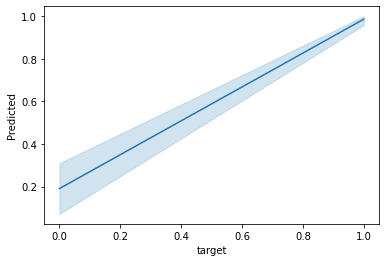

In [21]:
# Lineplot doesn't look right...

sns.lineplot(data=validdf, x='target', y='Predicted')

In [22]:
# Let's try countplot
targetcounts = validdf.loc[:,'target'].value_counts() # Use slicing
targetcounts

1    72
0    42
Name: target, dtype: int64

In [23]:
predcounts = validdf.loc[:,'Predicted'].value_counts() # Use slicing
predcounts

1    79
0    35
Name: Predicted, dtype: int64

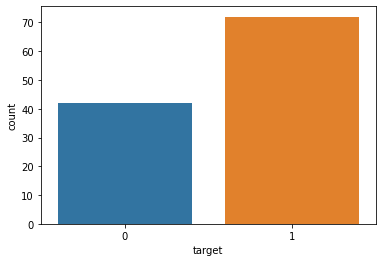

In [24]:
sns.countplot(data=validdf, x="target")

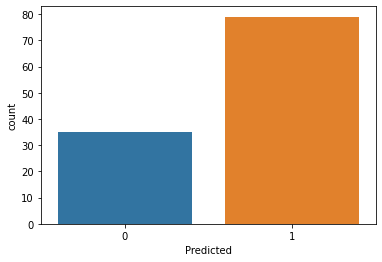

In [25]:
sns.countplot(data=validdf, x="Predicted")

In [26]:
# Replace 0 and 1 with correct labels

validdf2 = validdf.copy()
validdf2['target'] = validdf2['target'].replace(to_replace=[0,1], value=('Malignant','Benign'))
validdf2['Predicted'] = validdf2['Predicted'].replace(to_replace=[0,1], value=('Malignant','Benign'))
validdf2


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,Predicted
0,13.850,19.60,88.68,592.6,0.08684,0.06330,0.01342,0.02293,0.1555,0.05673,...,100.90,749.1,0.1118,0.1141,0.04753,0.05890,0.2513,0.06911,Benign,Benign
1,16.140,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,0.05875,...,115.90,947.9,0.1206,0.1722,0.23100,0.11290,0.2778,0.07012,Benign,Malignant
2,12.880,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,0.1566,0.05708,...,88.84,595.7,0.1227,0.1620,0.24390,0.06493,0.2372,0.07242,Benign,Benign
3,11.600,18.36,73.88,412.7,0.08508,0.05855,0.03367,0.01777,0.1516,0.05859,...,82.68,495.1,0.1342,0.1808,0.18600,0.08288,0.3210,0.07863,Benign,Benign
4,14.540,27.54,96.73,658.8,0.11390,0.15950,0.16390,0.07364,0.2303,0.07077,...,124.10,943.2,0.1678,0.6577,0.70260,0.17120,0.4218,0.13410,Malignant,Malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,11.990,24.89,77.61,441.3,0.10300,0.09218,0.05441,0.04274,0.1820,0.06850,...,84.48,513.9,0.1311,0.1822,0.16090,0.12020,0.2599,0.08251,Benign,Benign
110,17.570,15.05,115.00,955.1,0.09847,0.11570,0.09875,0.07953,0.1739,0.06149,...,134.90,1227.0,0.1255,0.2812,0.24890,0.14560,0.2756,0.07919,Malignant,Malignant
111,23.270,22.04,152.10,1686.0,0.08439,0.11450,0.13240,0.09702,0.1801,0.05553,...,184.20,2403.0,0.1228,0.3583,0.39480,0.23460,0.3589,0.09187,Malignant,Malignant
112,8.726,15.83,55.84,230.9,0.11500,0.08201,0.04132,0.01924,0.1649,0.07633,...,64.48,284.4,0.1724,0.2364,0.24560,0.10500,0.2926,0.10170,Benign,Benign


In [27]:
validdf3 = pd.concat([validdf2['Predicted'],validdf2['target']], axis =1)
validdf3

,Predicted,target
0,Benign,Benign
1,Malignant,Benign
2,Benign,Benign
3,Benign,Benign
4,Malignant,Malignant
...,...,...
109,Benign,Benign
110,Malignant,Malignant
111,Malignant,Malignant
112,Benign,Benign


(0.0, 90.0)

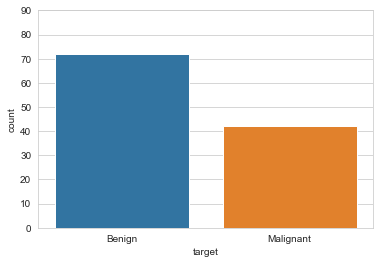

In [28]:
sns.set_style("whitegrid")
sns.countplot(data=validdf3, x="target")
plt.ylim(0,90)

(0.0, 90.0)

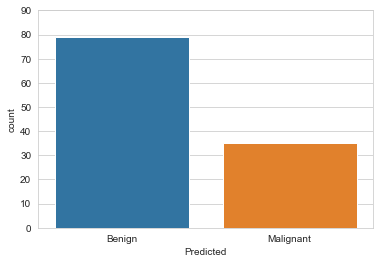

In [29]:
sns.set_style("whitegrid")
sns.countplot(data=validdf3, x="Predicted")
plt.ylim(0,90)

In [30]:
# Reset grid style so later graphs don't have this

sns.set_style("whitegrid", {'axes.grid' : False})

# Compare with K-nearest neighbours

In [31]:
# K-nearest neighbours is tricky to work with huge dimensions, lots of different features to correlate

In [32]:
# Finding the range of accuracies

x = cancer.data
y = cancer.target
best = 0
for _ in range(30): # Repeats up to 30 times to find the best accuracy value score
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)
    
    model = KNeighborsClassifier(n_neighbors=9)
    
    model.fit(x_train, y_train)
    
    acc = model.score(x_test, y_test)
    print (acc)
    if acc > best:
        best = acc
print('The best value is:', best)

0.9649122807017544
0.9824561403508771
1.0
0.8947368421052632
0.9122807017543859
0.8947368421052632
0.8947368421052632
0.9824561403508771
0.9473684210526315
0.8596491228070176
0.9298245614035088
0.9649122807017544
0.9649122807017544
0.9122807017543859
0.9473684210526315
0.9473684210526315
0.9122807017543859
0.9649122807017544
0.8947368421052632
0.8947368421052632
0.9122807017543859
0.9298245614035088
0.9298245614035088
0.9298245614035088
0.9298245614035088
0.9298245614035088
0.9473684210526315
0.9649122807017544
0.9298245614035088
1.0
The best value is: 1.0


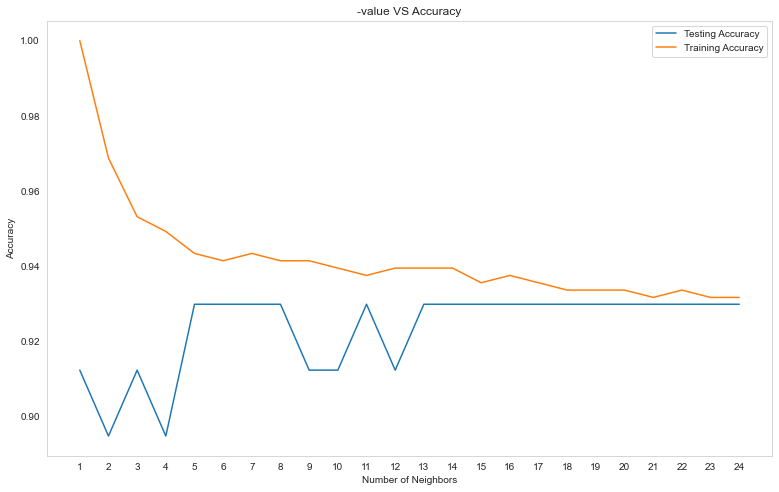

Best accuracy is 0.9298245614035088 with K = 5


In [33]:
# Model complexity

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

counter = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

# Loop over different values of k
for i, k in enumerate(counter):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(counter, test_accuracy, label = 'Testing Accuracy')
plt.plot(counter, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(counter)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

Text(0, 0.5, 'Score ACC')

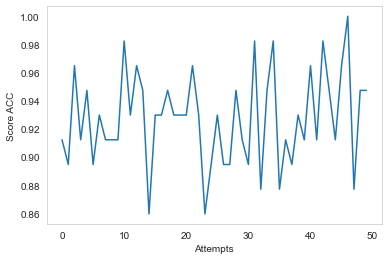

In [34]:
# Finding the range of accuracies for KNN

x = cancer.data
y = cancer.target

acclist = []
counter = []

for i in range(50): # Repeats up to 30 times to find the best accuracy value score
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)
    model = KNeighborsClassifier(n_neighbors=9)
    model.fit(x_train, y_train)
    acc = model.score(x_test, y_test)
    acclist.append(acc)
    counter.append(i)

KNNlist = list(acclist)
sns.lineplot(x=counter,y=acclist)
plt.xlabel('Attempts')
plt.ylabel('Score ACC')

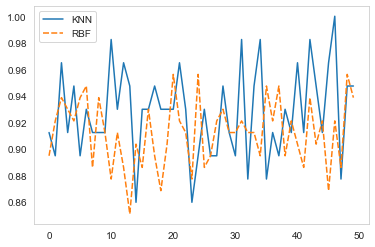

In [35]:
df = pd.DataFrame(zip(KNNlist,RBFlist), columns=['KNN','RBF'])
sns.lineplot(data = df)